In [27]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);
import rtclass as rtc; reload(rtc);

np.seterr(divide = 'ignore');


In [22]:
nils_data_all = pd.read_csv('COVID19_data_PAPER_VERSION.csv',sep=';')
nils_data = nils_data_all[['Date','Country','Growth rate','R','Confirmed']].replace(0,np.nan).dropna(thresh = 2)
nils_data['Date'] = pd.to_datetime(nils_data['Date'],format = '%Y-%m-%d')
nils_data

,Date,Country,Growth rate,R,Confirmed
0,2019-01-12,Albania,NaN,NaN,NaN
1,2019-01-13,Albania,NaN,NaN,NaN
2,2019-01-14,Albania,NaN,NaN,NaN
3,2019-01-15,Albania,NaN,NaN,NaN
4,2019-01-16,Albania,NaN,NaN,NaN
...,...,...,...,...,...
37725,2020-05-11,US - Wisconsin,0.025704,NaN,10418.0
37726,2020-05-12,US - Wisconsin,0.025900,NaN,10611.0
37727,2020-05-13,US - Wisconsin,0.026865,NaN,10902.0
37728,2020-05-14,US - Wisconsin,NaN,NaN,11275.0


In [32]:
rt = rtc.RtComputation(resolve_US_states = True, HighestDensityIntervals = [.95])

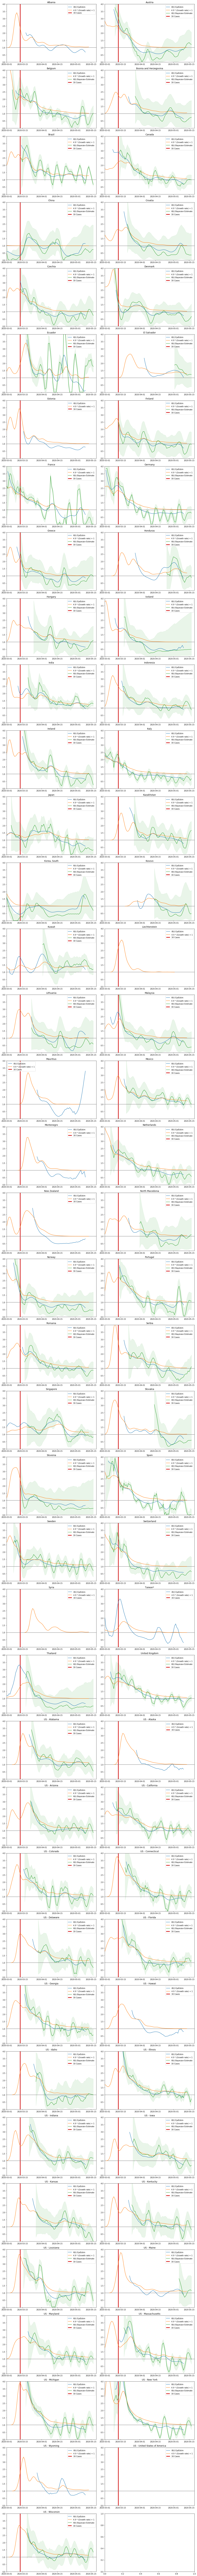

In [41]:
figlen = len(nils_data['Country'].unique())//2 + len(nils_data['Country'].unique()) % 2
fig,axes = plt.subplots(figlen,2,figsize = (15,5*figlen))
ax = axes.flatten()

for i,country in enumerate(nils_data['Country'].unique()):
    
    r = rt.CountryData(country)
    #print(r)
    restricted_data = nils_data[nils_data['Country'] == country]
    threshold_date = nils_data[nils_data['Confirmed'] >= 30].Date.values[0]
    ax[i].plot(restricted_data['Date'],restricted_data['R'],label = r'$R(t)$ EpiEstim', c = 'TAB:BLUE')
    ax[i].plot(restricted_data['Date'],4.9*restricted_data['Growth rate']+1,label = '4.9 * (Growth rate) + 1', c = 'TAB:ORANGE')
    if not r is None:
        ax[i].plot(r.index,r['Rt'], c = 'TAB:GREEN', label = r'$R(t)$ Bayesian Estimate')
        ax[i].fill_between(r.index,r['Low_95'],r['High_95'],color = 'TAB:GREEN', alpha = .1)
    ax[i].vlines(threshold_date,0,4, lw = 4, color = 'TAB:RED', label = '30 Cases')
    ax[i].hlines(1,datetime.datetime.strptime('2020-03-01','%Y-%m-%d'),datetime.datetime.now(), color = 'TAB:GRAY')
    ax[i].set_ylim([0,4])
    ax[i].set_title(country)
    ax[i].legend()
    ax[i].set_xlim(datetime.datetime.strptime('2020-03-01','%Y-%m-%d'),datetime.datetime.now())

fig.tight_layout()
fig.savefig('Compare_Rt_Calculations.pdf')